In [20]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [21]:
cif = tf.keras.datasets.cifar10
(x_train , y_train ),( x_test , y_test )= cif.load_data()
x_test , x_train = x_test / 255.0 , x_train / 255.0

170498071/170498071 [==============================] - 14s 0us/step


In [22]:
x_train[0].shape

(32, 32, 3)

In [23]:
model = tf.keras.models.Sequential([

    # deep learning
    tf.keras.layers.Conv2D(filters= 128 , kernel_size = (3,3) , activation="relu" ,input_shape=(32,32 , 3) ) ,
    tf.keras.layers.Conv2D(filters= 128 , kernel_size = (3,3) , activation="relu") ,
    tf.keras.layers.MaxPooling2D() ,
    tf.keras.layers.Dropout(0.4) ,

    tf.keras.layers.Conv2D(filters= 256 , kernel_size = (3,3) , activation="relu") ,
    tf.keras.layers.Conv2D(filters= 256 , kernel_size = (3,3) , activation="relu") ,
    tf.keras.layers.MaxPooling2D() ,
    tf.keras.layers.Dropout(0.4) ,

    tf.keras.layers.Flatten() ,

    # machine learning / fully connected
    tf.keras.layers.Dense(250 , activation="sigmoid") ,
    tf.keras.layers.Dropout(0.6) ,
    tf.keras.layers.Dense(10 , activation="softmax")
])



In [24]:
model.compile(optimizer= "adamax" , loss= tf.keras.losses.sparse_categorical_crossentropy , metrics=["accuracy"])

out = model.fit(x_train , y_train , epochs= 50)
model.evaluate(x_test , y_test)

Epoch 1/50
1563/1563 [==============================] - 21s 12ms/step - loss: 1.7831 - accuracy: 0.3427
Epoch 2/50
1563/1563 [==============================] - 19s 12ms/step - loss: 1.3767 - accuracy: 0.5021
Epoch 3/50
1563/1563 [==============================] - 19s 12ms/step - loss: 1.1751 - accuracy: 0.5852
Epoch 4/50
1563/1563 [==============================] - 20s 13ms/step - loss: 1.0280 - accuracy: 0.6417
Epoch 5/50
1563/1563 [==============================] - 19s 12ms/step - loss: 0.9200 - accuracy: 0.6788
Epoch 6/50
1563/1563 [==============================] - 19s 12ms/step - loss: 0.8472 - accuracy: 0.7067
Epoch 7/50
1563/1563 [==============================] - 19s 12ms/step - loss: 0.7843 - accuracy: 0.7286
Epoch 8/50
1563/1563 [==============================] - 19s 12ms/step - loss: 0.7385 - accuracy: 0.7447
Epoch 9/50
1563/1563 [==============================] - 19s 12ms/step - loss: 0.6920 - accuracy: 0.7580
Epoch 10/50
1563/1563 [==============================] - 19s 12m

[0.5944812297821045, 0.8410999774932861]

In [25]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 128)       3584      
                                                                 
 conv2d_13 (Conv2D)          (None, 28, 28, 128)       147584    
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 128)       0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 14, 14, 128)       0         
                                                                 
 conv2d_14 (Conv2D)          (None, 12, 12, 256)       295168    
                                                                 
 conv2d_15 (Conv2D)          (None, 10, 10, 256)       590080    
                                                      

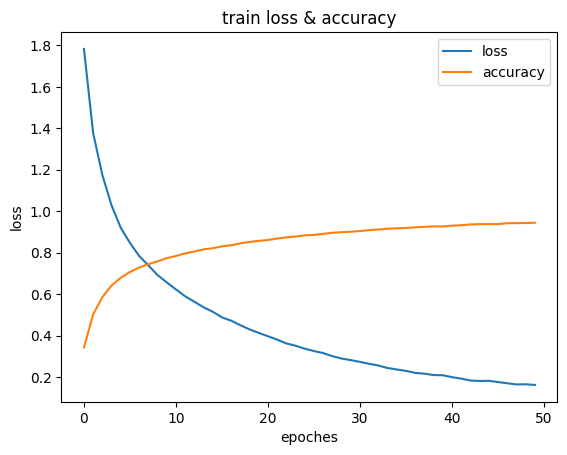

In [26]:
plt.plot(out.history["loss"] )
plt.plot( out.history["accuracy"])
plt.xlabel("epoches")
plt.ylabel("loss")
plt.title("train loss & accuracy")
plt.legend(["loss" , "accuracy"])
plt.show()